## Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

 1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
 2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
 3. Married - This refers to applicant being in a state of matrimony
 4. Dependents - This refres to persons who depends on the applicants for survival
 5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
 6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
 7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
 8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
 9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
 10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
 11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
 12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
 13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


## Import Necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv('loan_prediction.csv')

In [3]:
print('No. of rows ',df.shape[0])
print('No. of columns ',df.shape[1])

df.head()

No. of rows  614
No. of columns  13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In the dataset contains the details of customers in which  both numerical and categorical data are present. Here "Loan_status" is the target variable which contains 2 categories so it will be  termed as "Classification problem".

In [4]:
# Checking the columns in the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Checking the name, its datatype and its count of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We get the good overview of the data we seems that there are 4 columns has float64, 1 has int32 and 8 has object datatypes.

In [6]:
# Checking the duplicate value in the dataset
df.duplicated().sum()

0

As we see there are not any duplicate value in the dataset.

In [7]:
# Checking the missing value in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we see there are missing values present in this dataset. We can fill these value using mean, mode, median method but first we need to check outliers in numerical columns for understanding we use mean or median method. and also count value of each columns for better understanding.

In [8]:
# Checking the unique value of each columns
df.nunique().to_frame('No of unique values ')

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


We see that ApplicantIncome, CoapplicantIncome, LoanAmount has numerical columns and other are categorical columns.

In [9]:
# Checking value count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50,'\n')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
************************************************** 

Gender
Male      489
Female    112
Name: count, dtype: int64
************************************************** 

Married
Yes    398
No     213
Name: count, dtype: int64
************************************************** 

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
************************************************** 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
************************************************** 

Self_Employed
No     500
Yes     82
Name: count, dtype: int64
************************************************** 

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 50

We can see Loan_Amount_Term and Credit_History has float64 datatypes but in Loan_Amount_Term has only 10 class and Credit_History has only two class. So they has categorical columns Hence we use mode method.

<Axes: >

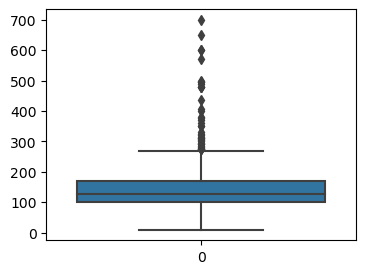

In [10]:
plt.figure(figsize=(4,3))
sns.boxplot(df['LoanAmount'])

We can see that Loan amout columns has outliers use we fill value using median method.

In [11]:
# Fill Missing value with mode for categorical features
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

# FIll Missing value with median for Numerical features
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

1. Missing values in Loan amount is impute with median value.
2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [12]:
# Remove unwanted columns
df = df.drop(columns=['Loan_ID'],axis=1)

df.shape

(614, 12)

In [13]:
categorical = ['Gender','Married','Dependents','Education','Self_Employed',
             'Loan_Amount_Term','Credit_History','Property_Area']

numerical = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

## Description of Dataset

In [14]:
# Statistical summary of numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From the above description we cam observe the following :-
 1. In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
 2. Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
 3. Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
 4. Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
 5. Minimum Applicant income is 150 and maximum is 81000.

## Data Visualization 

### Univariate Analysis

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


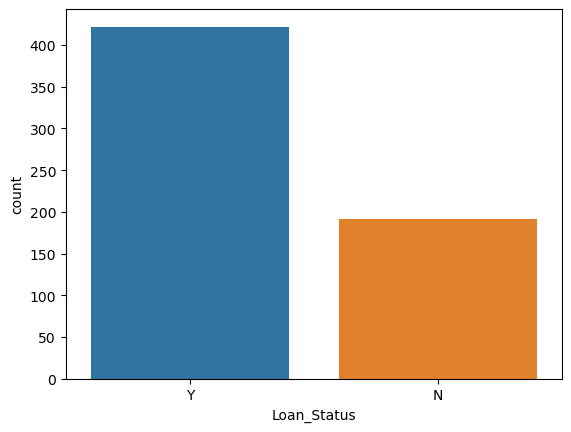

In [15]:
# Visualize the the Loan_Status target columns
print(df['Loan_Status'].value_counts(normalize=True))

sns.countplot(x=df['Loan_Status'])
plt.show()

We can observe that 68.7% Applicants gets loan Approval. We can see that dataset is imbalanced in nature.

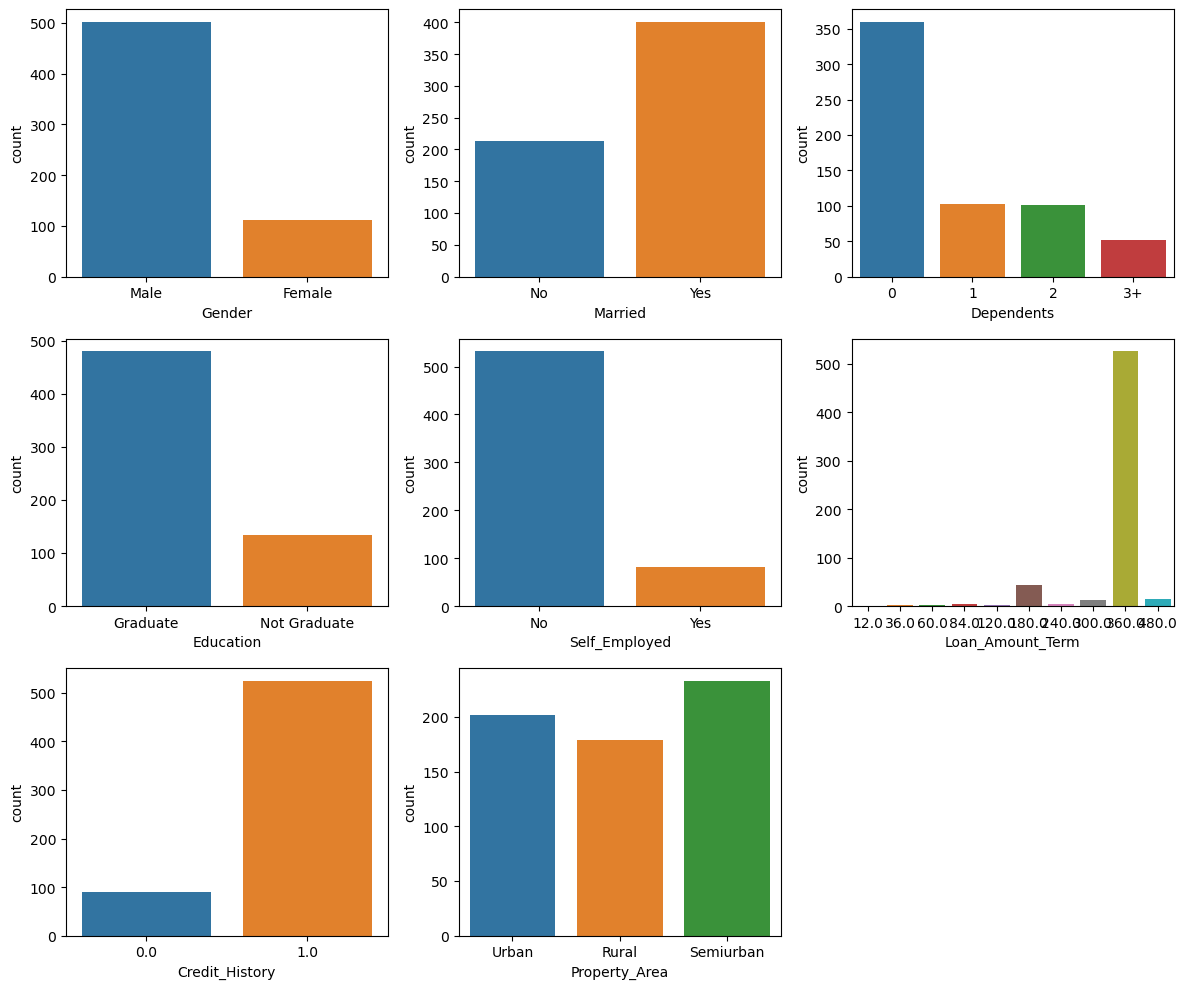

In [16]:
# Checking count of each categorical columns
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in categorical:
    if plotnumber<=8:
        plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

1. We can observe that the count of Male are very high compared to the count of Female aprox 3x time.
2. We can observe that the count of Maried are high compared to the count of Not Maried aprox double.
3. We can observe that the count of those they has single those have dependent one or two or three almost same count.
4. We can observe that the count of Graduate are very high compared to the count of Not Graduate aprox 3x time.
5. We can observe that the count of Self_Employed are very high compared to the count of Not Self_Employed aprox 3x time.
6. In the Loan_Amount_Term has 10 class so figsize is small so we plot another graph in next cell.
7. We can observe that the count of Credit_History 1.0 are very high compared to the count of Credit_History 0.0 aprox 3x time.
8. We observe that there are not signifient difference in Property_Area all class has equal count.

Loan_Amount_Term
360.0    85.667752
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: proportion, dtype: float64


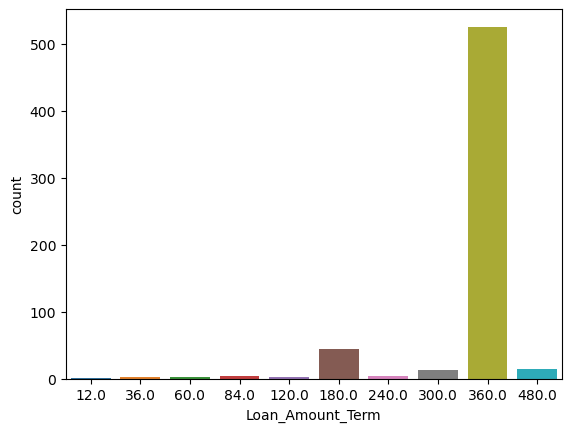

In [17]:
# Checking the count of Loan_Amount_Term columns
print(df['Loan_Amount_Term'].value_counts(normalize=True)*100)
sns.countplot(x=df['Loan_Amount_Term'])
plt.show()

We can obseve that 85.6% customers Loan_Amount_Term has 360 duaration.

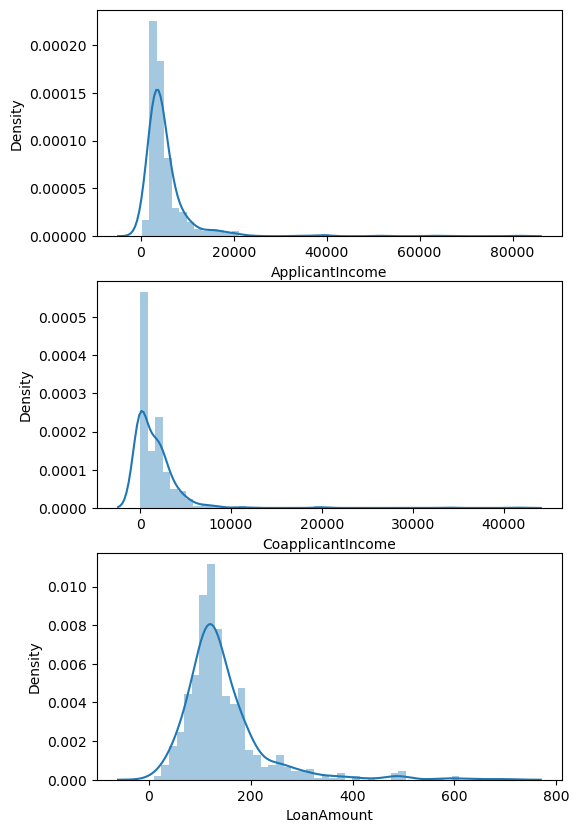

In [18]:
# Let's check how the data has been distributed in numerical columns
fig,axs=plt.subplots(3,1,figsize=(6,10))

sns.distplot(x=df['ApplicantIncome'],ax=axs[0],axlabel='ApplicantIncome')
sns.distplot(x=df['CoapplicantIncome'],ax=axs[1],axlabel='CoapplicantIncome')
sns.distplot(x=df['LoanAmount'],ax=axs[2],axlabel='LoanAmount')
plt.show()

From the above distribution plots we can notice that the data is not normal in all the columns and skewed to the right.

### Bivariate Analysis

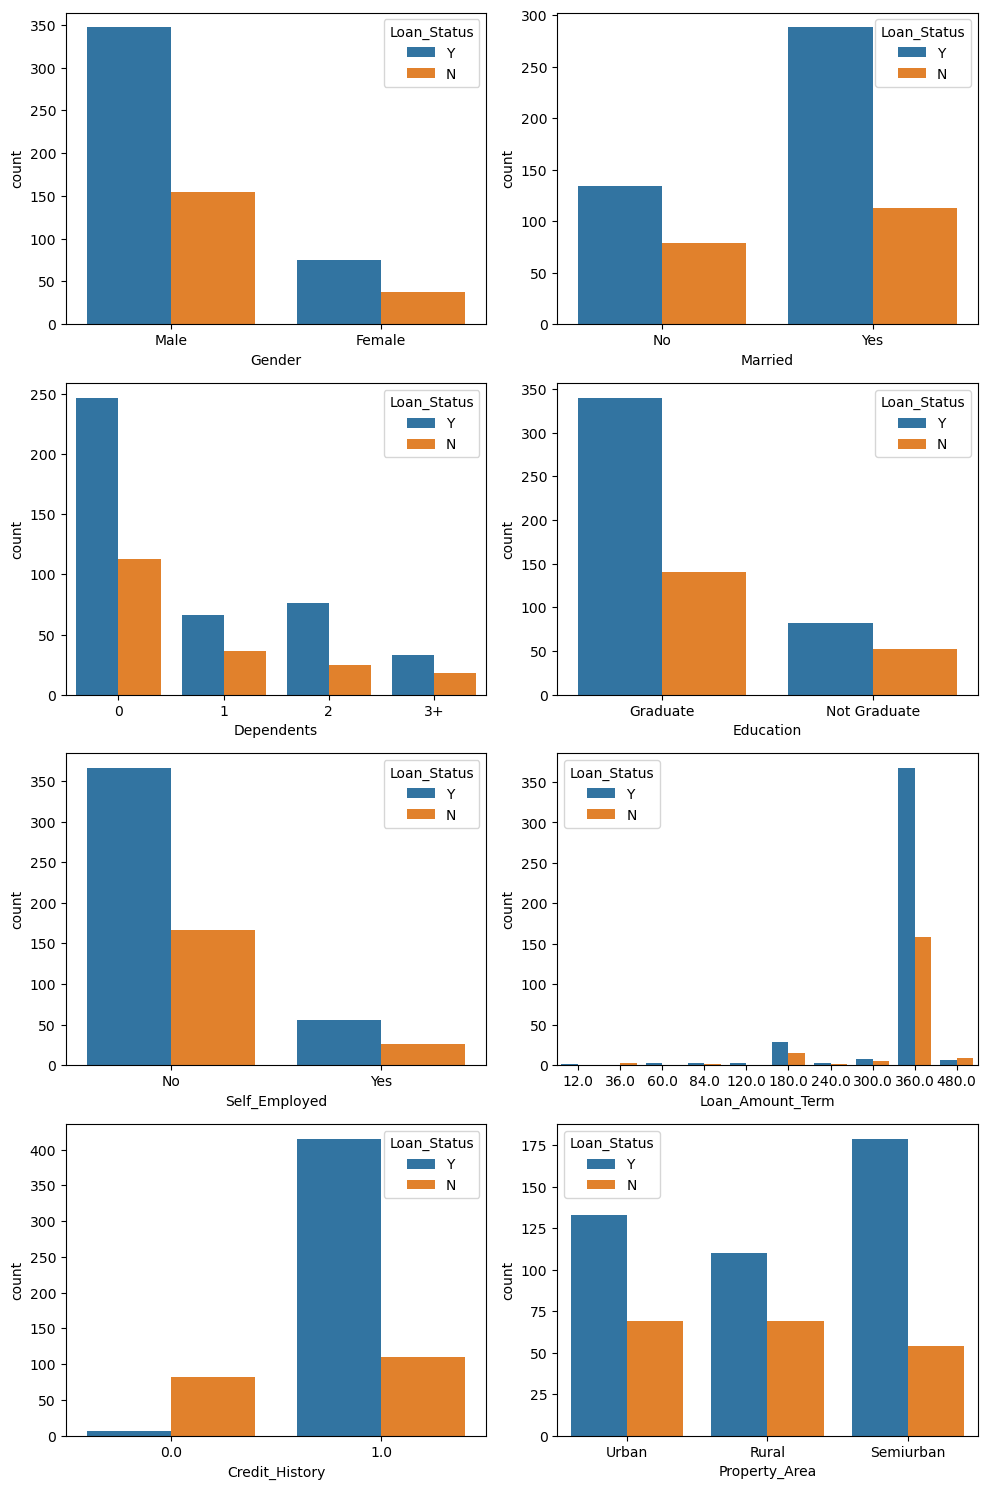

In [19]:
# Checking count of each categorical columns vs target columns
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for col in categorical:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.countplot(x=df[col],hue=df['Loan_Status'])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

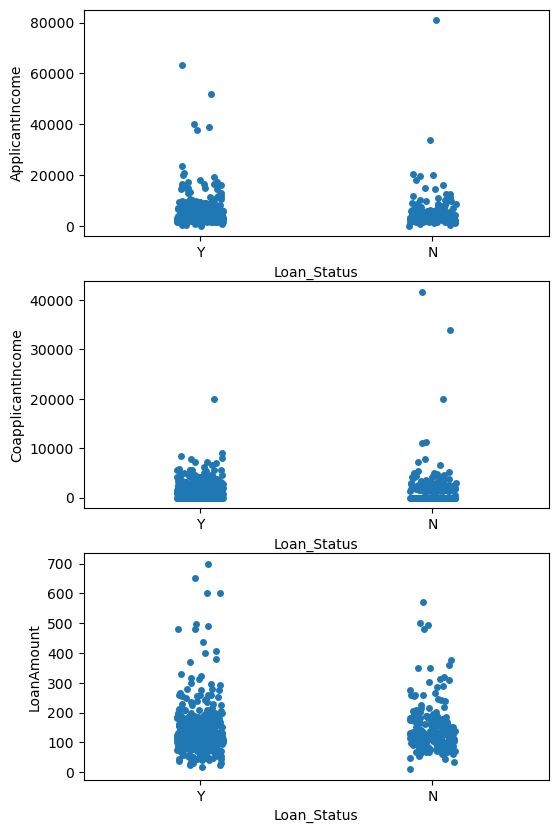

In [20]:
# Let's check the relationship between numerical feature vs target columns
fig,axs=plt.subplots(3,1,figsize=(6,10))

sns.stripplot(x=df['Loan_Status'],y=df['ApplicantIncome'],ax=axs[0])
sns.stripplot(x=df['Loan_Status'],y=df['CoapplicantIncome'],ax=axs[1])
sns.stripplot(x=df['Loan_Status'],y=df['LoanAmount'],ax=axs[2])
plt.show()

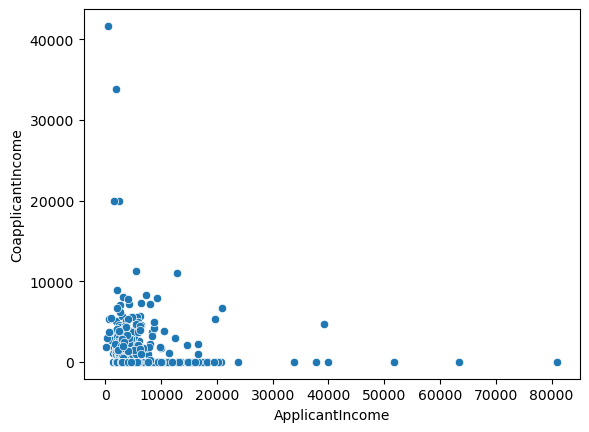

In [21]:
# Comparing ApplicantIncome vs CoapplicantIncome
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',data=df)
plt.show()

There is not significant relation between the features.

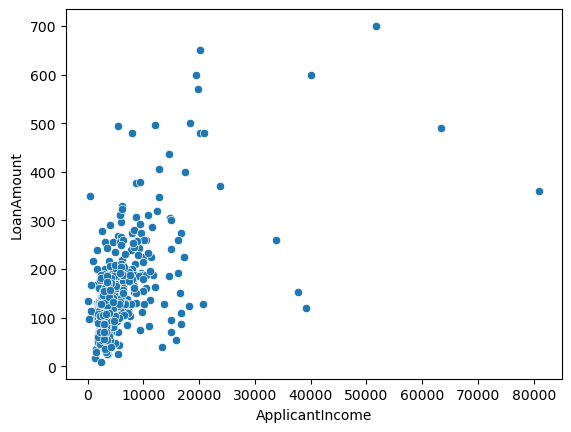

In [22]:
# Comparing ApplicantIncome vs CoapplicantIncome
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)
plt.show()

There is not significant relation between the features.

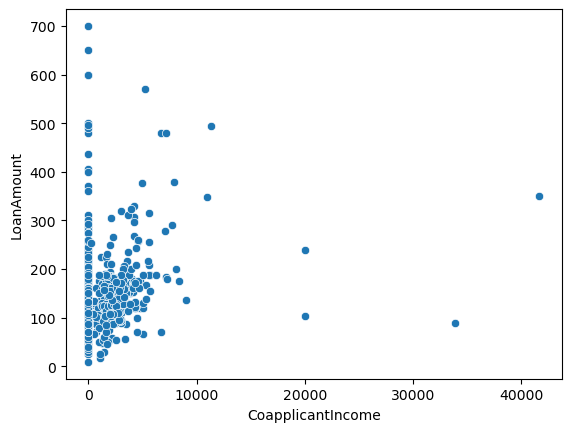

In [23]:
# Comparing ApplicantIncome vs CoapplicantIncome
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',data=df)
plt.show()

There is not significant relation between the features.

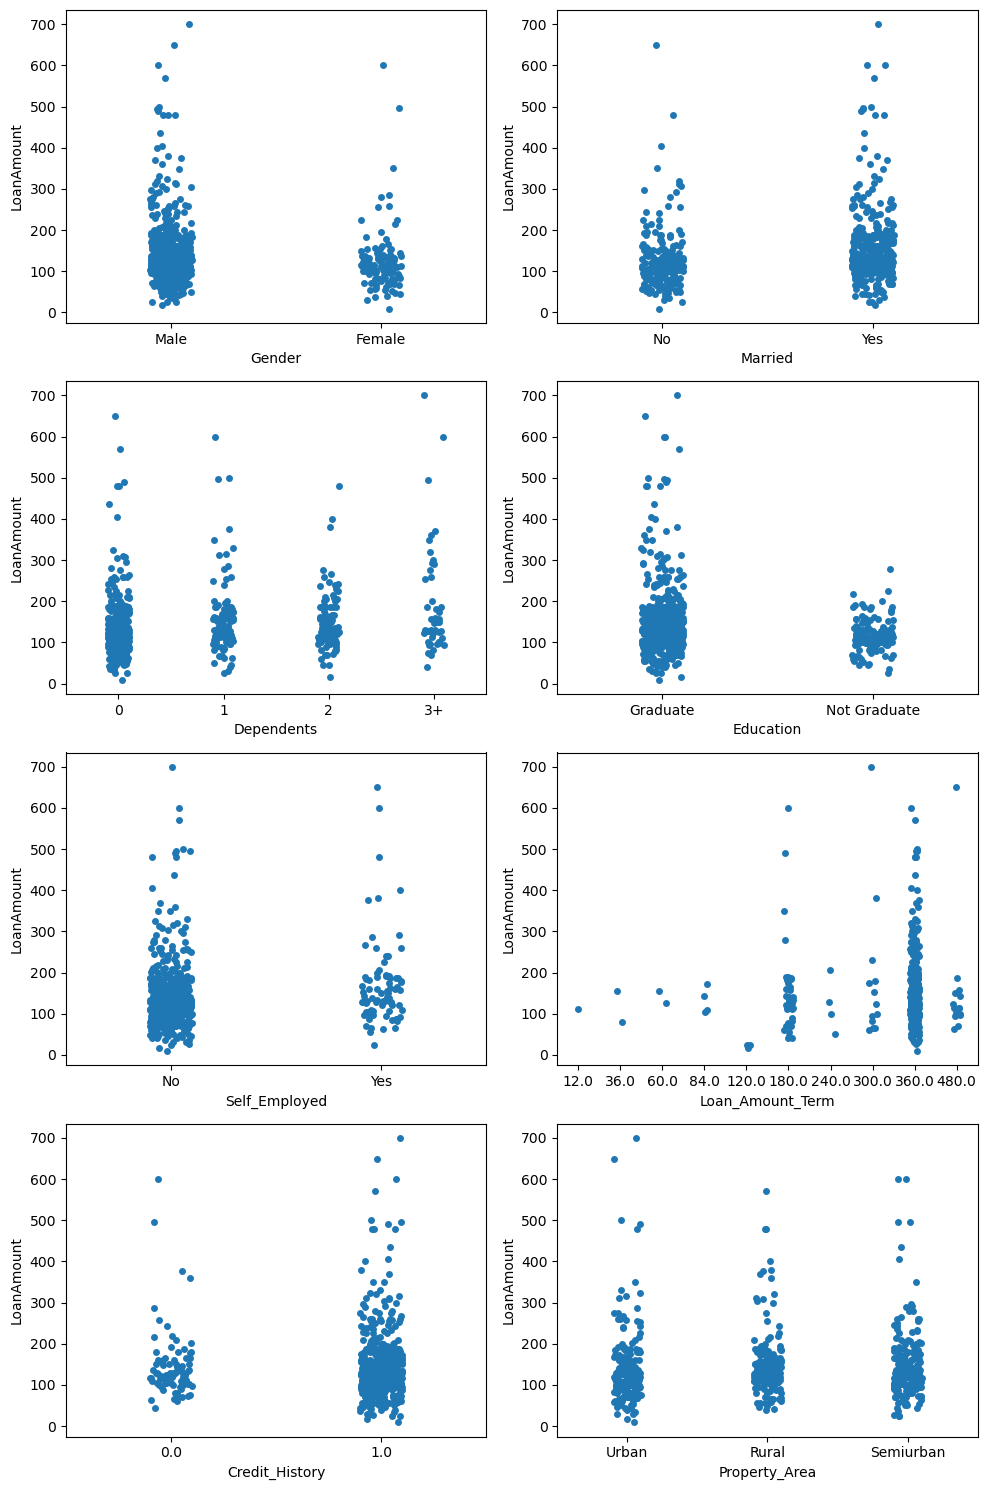

In [24]:
# Checking the relationship between categorical columns vs LoanAmount columns
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for col in categorical:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.stripplot(x=df[col],y=df['LoanAmount'])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

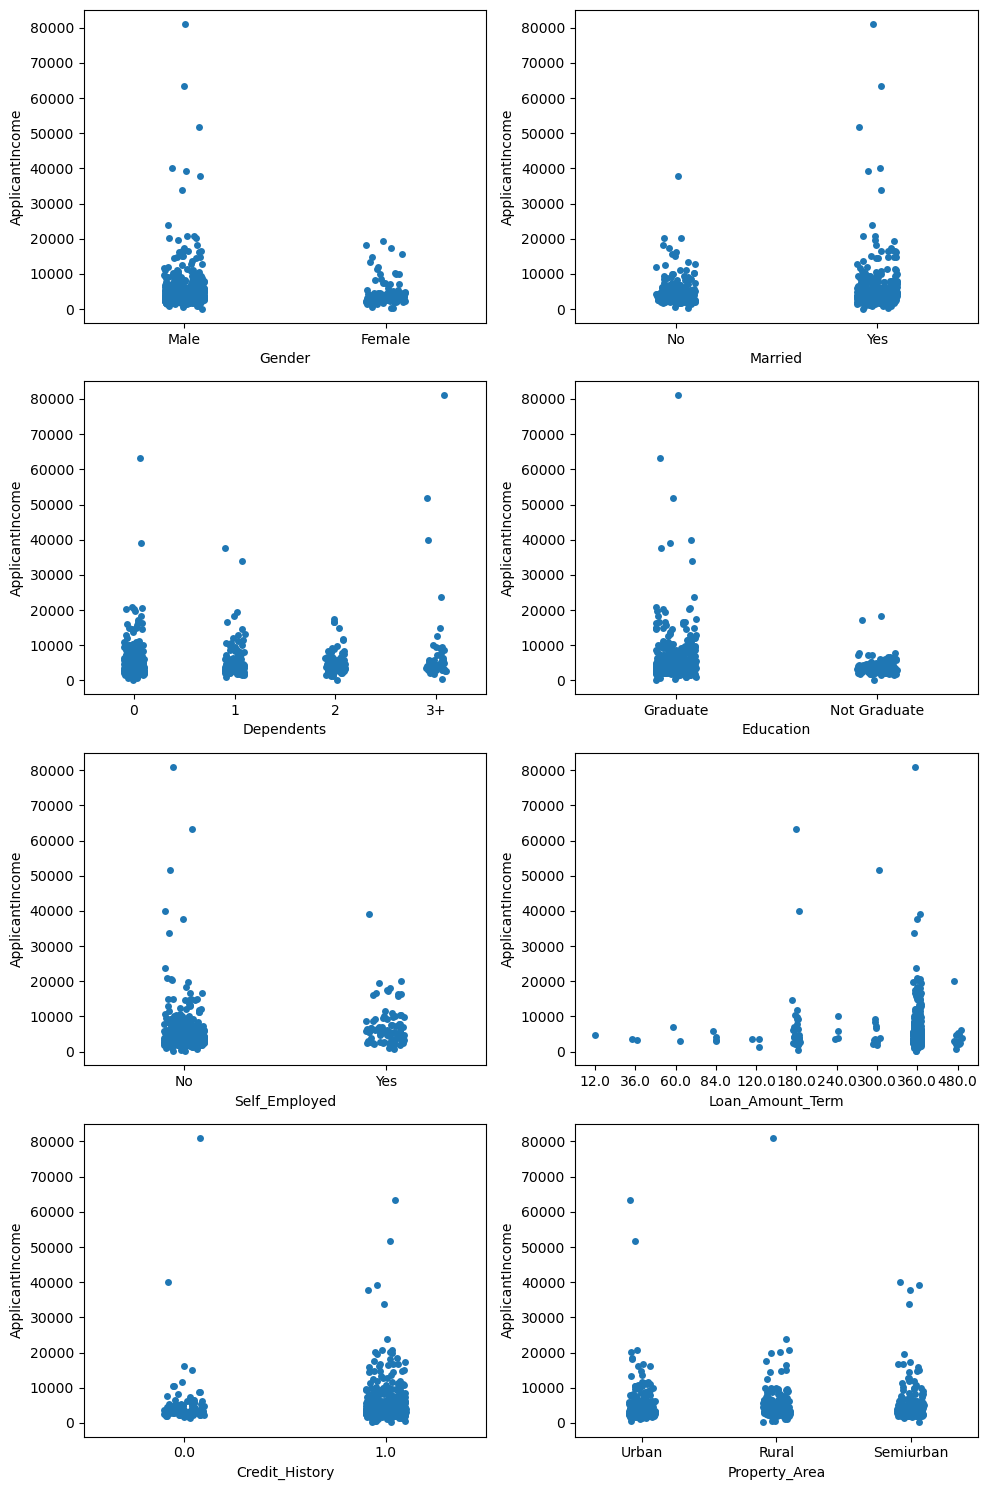

In [25]:
# Checking the relationship between categorical columns vs ApplicantIncome columns
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for col in categorical:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.stripplot(x=df[col],y=df['ApplicantIncome'])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

### Multivariate Analysis

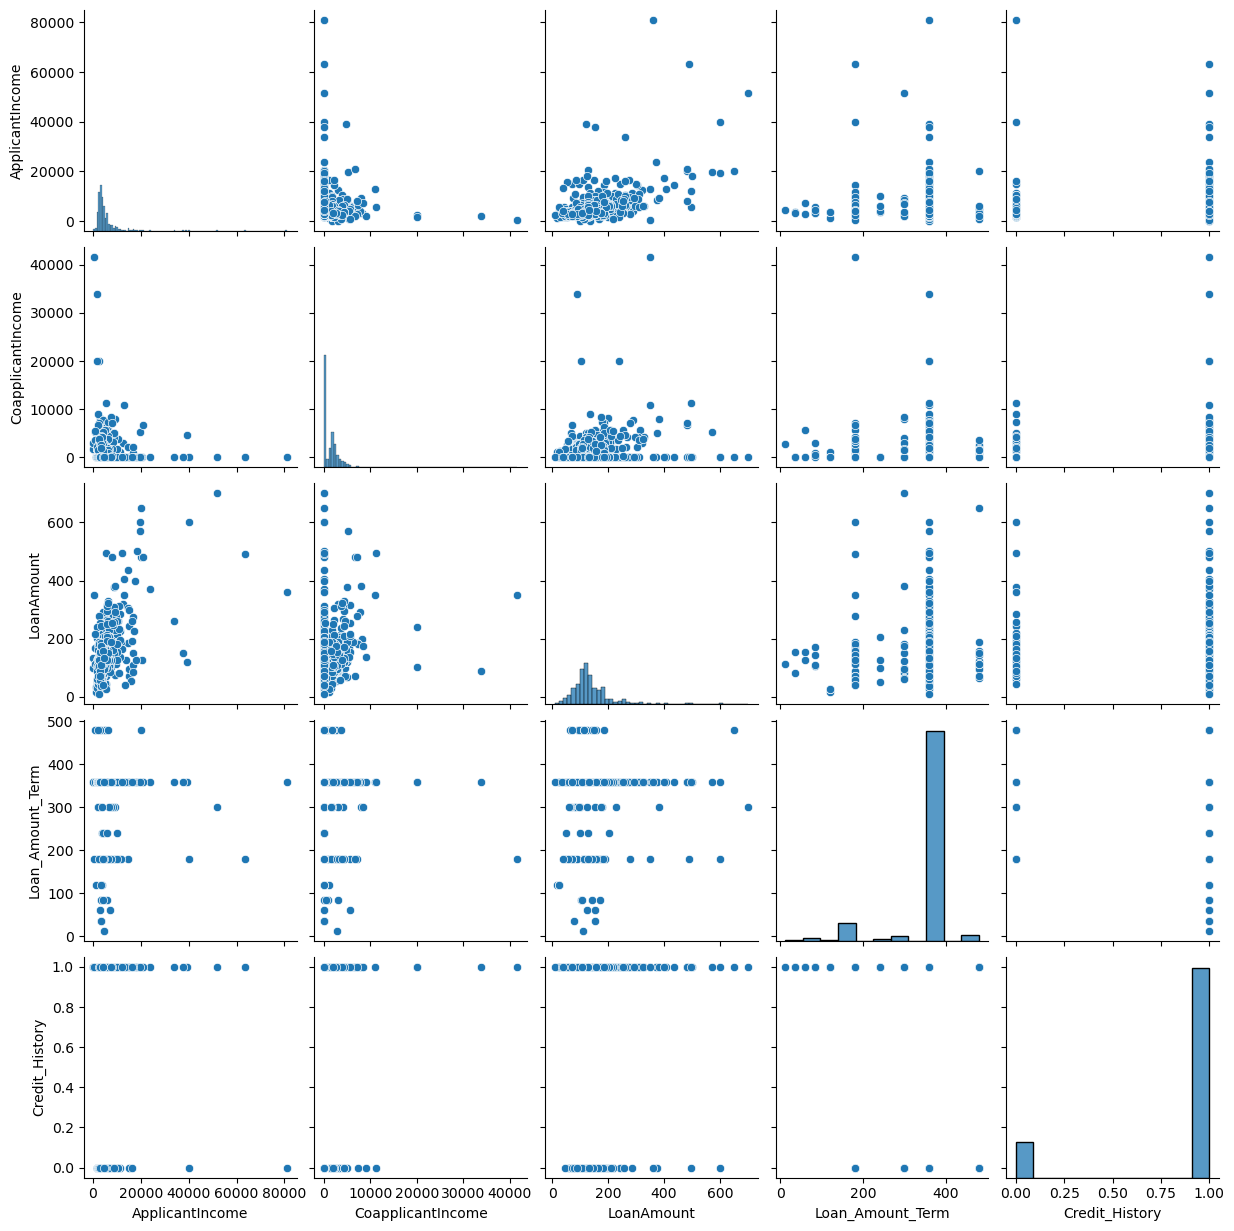

In [26]:
sns.pairplot(df)
plt.show()

## Identify Outliers 

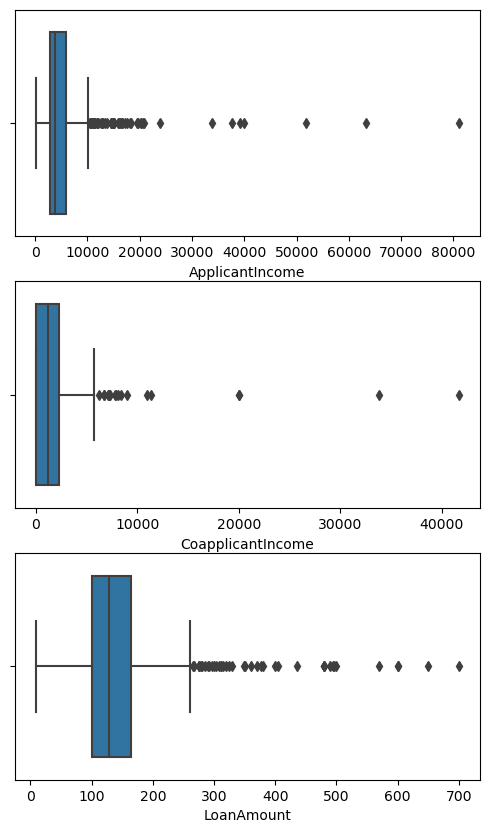

In [27]:
# Let's check the outliers by ploting boxplot
fig,axs=plt.subplots(3,1,figsize=(6,10))

sns.boxplot(x=df['ApplicantIncome'],ax=axs[0])
sns.boxplot(x=df['CoapplicantIncome'],ax=axs[1])
sns.boxplot(x=df['LoanAmount'],ax=axs[2])
plt.show()

All the columns has outliers so we need to remove outliers.

## Outliers Detection and removel

### Checking outliers using zscore method

In [28]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
df_feature = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  614
New Data Frame -  589

Data Loss Percentage After removing outliers with zscore method -
  4.071661237785016


It is affordable loss of data now we will check with IQR method

### Checking the outliers by using IQR metohd

In [29]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  614
New Data Frame -  535

Data Loss Percentage After removing outliers with zscore method -
  12.866449511400651


In [30]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(589, 12)

We use zscore method because its Loss less data then IQR method

#### Checking how the data has been distributed of numerical columns

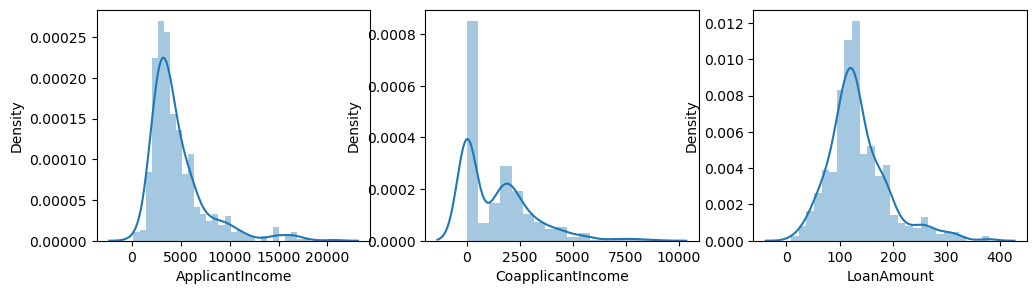

In [31]:
# Let's check how the data has been distributed in numerical columns
fig,axs=plt.subplots(1,3,figsize=(12,3))

sns.distplot(x=df['ApplicantIncome'],ax=axs[0],axlabel='ApplicantIncome')
sns.distplot(x=df['CoapplicantIncome'],ax=axs[1],axlabel='CoapplicantIncome')
sns.distplot(x=df['LoanAmount'],ax=axs[2],axlabel='LoanAmount')
plt.show()

The columns has skewness in te data. So we can remove skewness.

### Checking the skewness

In [32]:
print('The skewness of ApplicantIncome   :',df['ApplicantIncome'].skew())
print('The skewness of CoapplicantIncome :',df['CoapplicantIncome'].skew())
print('The skewness of LoanAmount        :',df['LoanAmount'].skew())

The skewness of ApplicantIncome   : 2.16476207904196
The skewness of CoapplicantIncome : 1.3531905540940208
The skewness of LoanAmount        : 1.114173164102511


### Removing skewness using boxcox method

In [33]:
from scipy.stats import boxcox
df['ApplicantIncome'] = boxcox(df['ApplicantIncome'],0.1)
df['CoapplicantIncome'] = boxcox(df['CoapplicantIncome'],0.5)
df['LoanAmount'] = boxcox(df['LoanAmount'],0.5)

### Checking  after remove skewness

In [34]:
print('The skewness of ApplicantIncome   :',df['ApplicantIncome'].skew())
print('The skewness of CoapplicantIncome :',df['CoapplicantIncome'].skew())
print('The skewness of LoanAmount        :',df['LoanAmount'].skew())

The skewness of ApplicantIncome   : 0.18536241365329942
The skewness of CoapplicantIncome : 0.21759844262627973
The skewness of LoanAmount        : 0.26804773069927884


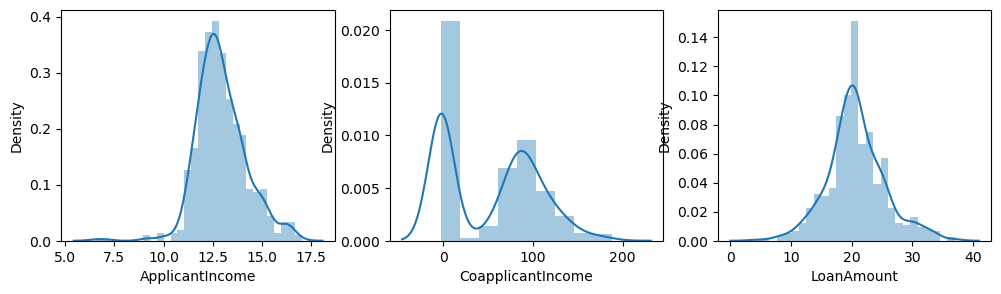

In [35]:
# Let's check how the data has been distributed in numerical columns
fig,axs=plt.subplots(1,3,figsize=(12,3))

sns.distplot(x=df['ApplicantIncome'],ax=axs[0],axlabel='ApplicantIncome')
sns.distplot(x=df['CoapplicantIncome'],ax=axs[1],axlabel='CoapplicantIncome')
sns.distplot(x=df['LoanAmount'],ax=axs[2],axlabel='LoanAmount')
plt.show()

This looks almsot normal and skewness is also removed.

## Encoding categorical columns

In [36]:
# Encoding categorical columns using OridnalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,13.807191,-2.000000,20.627417,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,13.233519,75.665951,20.627417,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,12.269585,-2.000000,14.248077,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,11.938778,95.118484,19.908902,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,13.867950,-2.000000,21.748684,360.0,1.0,2.0,1.0


In [37]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

## Correlation

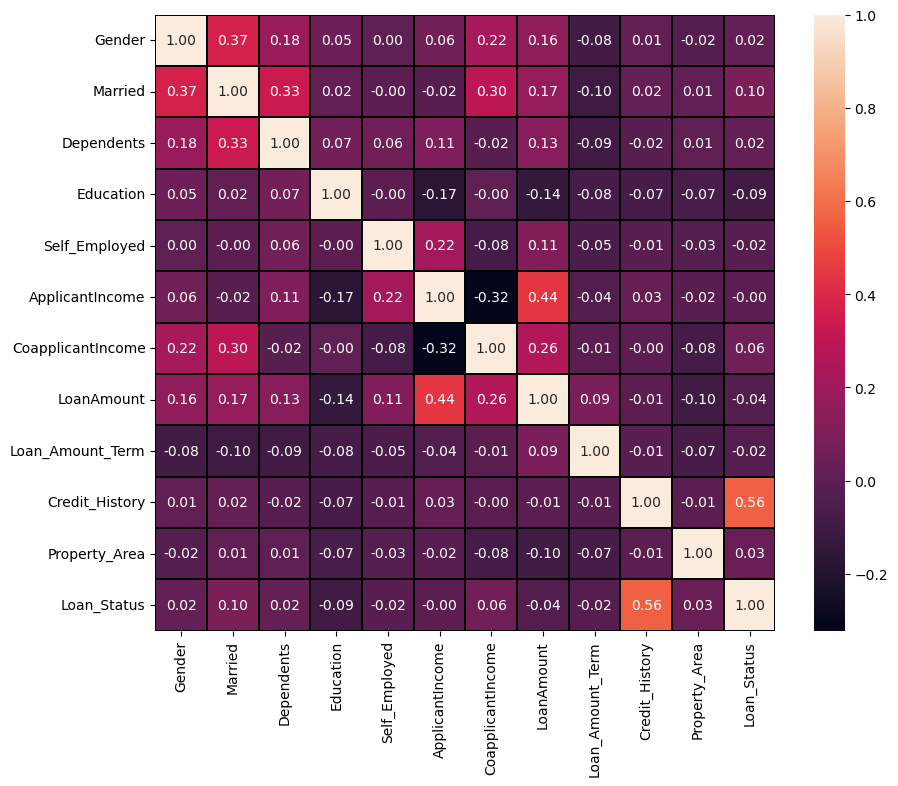

In [38]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation. There is no much postive and negative correlation.

### Correlation between feature vs target

In [39]:
df_corr['Loan_Status'].drop('Loan_Status').sort_values(ascending=False)

Credit_History       0.555908
Married              0.095124
CoapplicantIncome    0.064141
Property_Area        0.034894
Gender               0.021942
Dependents           0.021937
ApplicantIncome     -0.003741
Self_Employed       -0.016617
Loan_Amount_Term    -0.023119
LoanAmount          -0.035497
Education           -0.092852
Name: Loan_Status, dtype: float64

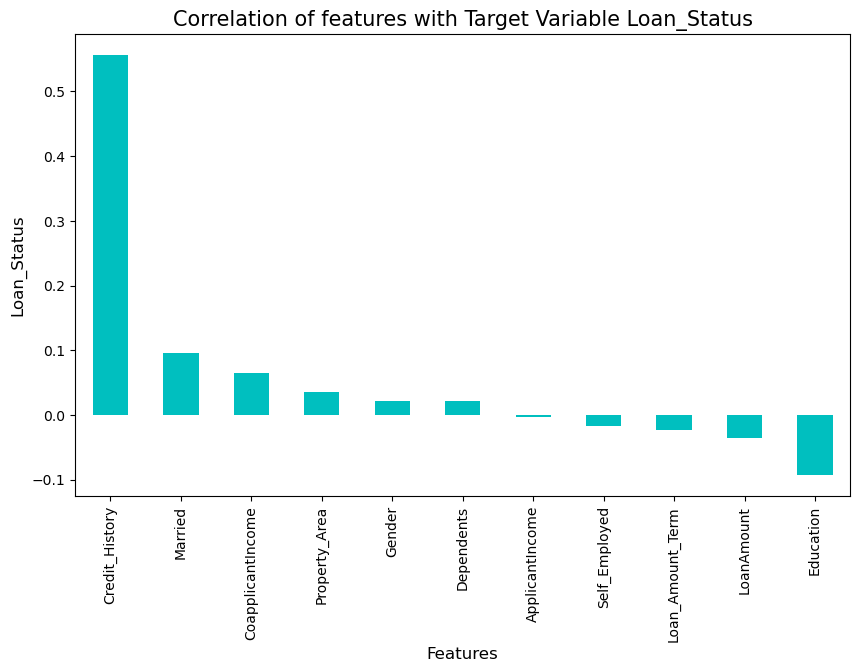

In [40]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Loan_Status',fontsize=12)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 15)
plt.show()

* Most of feature are poorly or moderately correlated with target variable expect Credit History. 
* Maximum correlation of 0.561 exist between Credit History and Loan status.

## Sparating features and target

In [41]:
x = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (589, 11)
Shape of y  (589,)


 ### Checking Variance Inflation Factor (VIF)

In [42]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,Gender,6.553271
1,Married,3.936553
2,Dependents,1.808356
3,Education,1.307066
4,Self_Employed,1.200234
5,ApplicantIncome,60.032011
6,CoapplicantIncome,2.744817
7,LoanAmount,31.909266
8,Loan_Amount_Term,23.962329
9,Credit_History,6.721310


Loan_Status
1.0    407
0.0    182
Name: count, dtype: int64


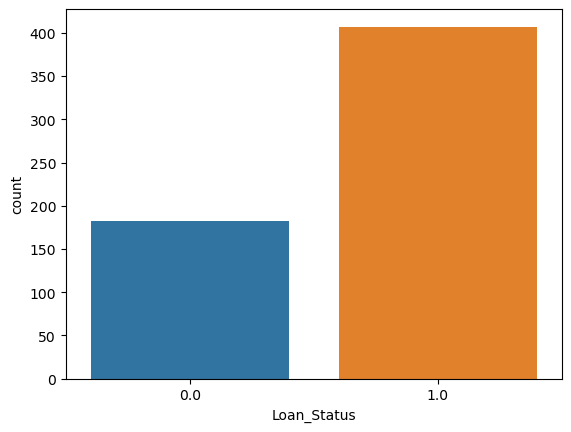

In [43]:
# Checking the count of target columns
print(y.value_counts())
sns.countplot(x=y)
plt.show()

Here we can see that the data is not balanced, since it is classification problem we will balance the data using oversampling method.

## OverSampling

In [44]:
# Oversampling the data
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1,y1 = SM.fit_resample(x,y)

Loan_Status
1.0    407
0.0    407
Name: count, dtype: int64


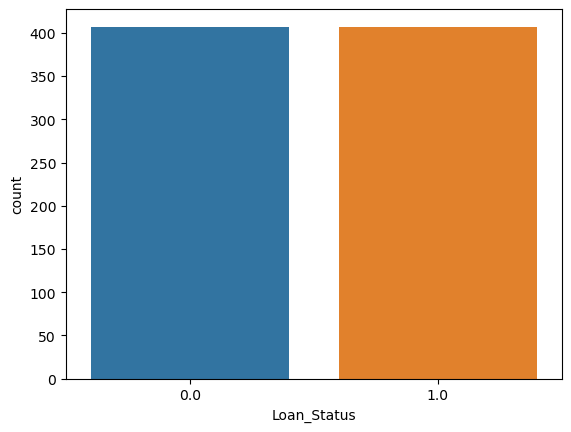

In [45]:
# Checking the count of target columns
print(y1.value_counts())
sns.countplot(x=y1)
plt.show()

Now the data is balanced.

## Feature Scaling using Standard Scalarization

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

x1.shape

(814, 11)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [47]:
# Find variance inflation factor in each scaled column i.e. x.shape[1] (1/1-R2)

vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

,Feature,VIF values
0,Gender,1.219961
1,Married,1.394132
2,Dependents,1.200608
3,Education,1.065069
4,Self_Employed,1.063702
5,ApplicantIncome,1.884056
6,CoapplicantIncome,1.650251
7,LoanAmount,1.792764
8,Loan_Amount_Term,1.062561
9,Credit_History,1.009170


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [48]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [49]:
maxAccu = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  90.19607843137256 at random_state 17


### Creating train test split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (610, 11)
The shape of y_train  (610,)
The shape of x_test   (204, 11)
The shape of y_test   (204,)


### Applying all Classification Model

In [51]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

In [52]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.7696078431372549

Confusion matrix : 
 [[62 44]
 [ 3 95]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.58      0.73       106
         1.0       0.68      0.97      0.80        98

    accuracy                           0.77       204
   macro avg       0.82      0.78      0.76       204
weighted avg       0.82      0.77      0.76       204

****************************************************************************************

Classification ML Algorithm model is KNeighbors 

Accuracy Score : 0.7843137254901961

Confusion matrix : 
 [[76 30]
 [14 84]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       106
         1.0       0.74      0.86      0.79        98

    accuracy                           0.78       204
   macro avg       0.79      0.79      0.78     

# Cross Validation

In [53]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    score = cross_val_score(model, x1, y1, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score          :" ,score)
    print("Mean Score     :",score.mean())
    print('Accuracy Score :',acc_score)
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score          : [0.70552147 0.73006135 0.80981595 0.7791411  0.75308642]
Mean Score     : 0.7555252594107401
Accuracy Score : 0.7696078431372549

Different between Accuracy vs Cross Val Score:  0.01408258372651483

***********************************************************************************

Cross Validation Score KNeighbors :

Score          : [0.71165644 0.72392638 0.78527607 0.75460123 0.7654321 ]
Mean Score     : 0.7481784442929638
Accuracy Score : 0.7843137254901961

Different between Accuracy vs Cross Val Score:  0.036135281197232305

***********************************************************************************

Cross Validation Score DecisionTree :

Score          : [0.66257669 0.69325153 0.82208589 0.88343558 0.82098765]
Mean Score     : 0.7764674695145042
Accuracy Score : 0.8333333333333334

Different between Accuracy vs Cross Val Score:  0.05686586381882919

***********************************************************

### ExtraTree  is out best model.

**We can see that ExtraTree   gives less error between accuracy score and CrossValidation.**

* Score          : [0.72392638 0.79141104 0.77300613 0.87730061 0.81481481]
* Mean Score     : 0.7960917973187913
* Accuracy Score : 0.8088235294117647

* Different between Accuracy vs Cross Val Score:  0.012731732092973402

## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with ExtraTree model

In [54]:
ET.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8],
              'max_depth' : [10,20,30],
             }

GCV = GridSearchCV(estimator = ET, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  ExtraTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                    min_samples_split=5)


Best score :  0.7852459016393443


## Final Model

In [57]:
model = GCV.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 0.7843137254901961

Confusion matrix :
 [[64 42]
 [ 2 96]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.97      0.60      0.74       106
         1.0       0.70      0.98      0.81        98

    accuracy                           0.78       204
   macro avg       0.83      0.79      0.78       204
weighted avg       0.84      0.78      0.78       204



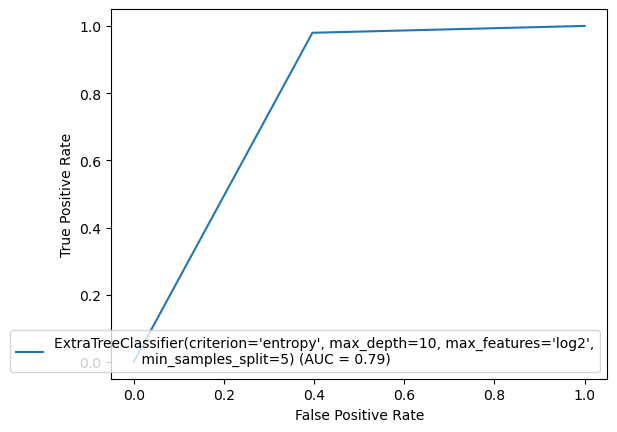

In [58]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

## Saving the model

In [59]:
import joblib
joblib.dump(model,'Loan_Application_Status_Prediction.pkl')

['Loan_Application_Status_Prediction.pkl']

## Predicting the saved model

In [60]:
# Let's load the saved model and get the predictions
model = joblib.load("Loan_Application_Status_Prediction.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.])